# 5.- MODELO 1: REGRESIÓN LOGARÍTMICA

Vamos a utilizar una regresion logistica, no lineal, porque necesitamos predecir una clasificación que es dicotomica: el cliente asegurado presentará o no presentará una reclamación económica.

In [37]:
# Importamos la librerias que vamos a utilizar

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Importo los datos
df4 = pd.read_csv("df_final_postEDA.csv",  sep = ";")

In [39]:
# Tamaño y estructura de df
df4.shape

(9043, 19)

In [40]:
df4.head()

,Unnamed: 0,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,GENDER_male,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0,0,2.0,1.0,0.0,1.0,12000.0,0,0,0,0.0,1,0,1,0,1,0,1,0
1,1,0,0.0,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,1,1,0,0,1,1,0
2,2,0,1.0,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,0,1,0,0,1,1,0
3,3,0,1.0,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,1,1,0,0,1,1,0
4,4,1,1.0,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,1,1,0,0,1,1,0


In [41]:
# Se retira del df las variables categoricas que han sido dumificadas. mantenemos las mas prevalentes (female,before 2015, majotity, sedan)
df4 = df4.drop(labels='GENDER_male', axis=1)

In [42]:
df4.head()


,Unnamed: 0,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,RACE_majority,RACE_minority,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0,0,2.0,1.0,0.0,1.0,12000.0,0,0,0,0.0,1,1,0,1,0,1,0
1,1,0,0.0,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,1,0,0,1,1,0
2,2,0,1.0,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,1,0,0,1,1,0
3,3,0,1.0,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,1,0,0,1,1,0
4,4,1,1.0,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,1,0,0,1,1,0


In [44]:
df4 = df4.drop(['RACE_minority', 'VEHICLE_YEAR_after 2015', 'VEHICLE_TYPE_sports car'], axis=1)

In [45]:
df4.head()

,Unnamed: 0,DRIVING_EXPERIENCE,INCOME,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,RACE_majority,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan
0,0,0,2.0,1.0,0.0,1.0,12000.0,0,0,0,0.0,1,1,0,1
1,1,0,0.0,0.0,0.0,0.0,16000.0,0,0,0,1.0,0,1,1,1
2,2,0,1.0,1.0,0.0,0.0,11000.0,0,0,0,0.0,1,1,1,1
3,3,0,1.0,1.0,0.0,1.0,11000.0,0,0,0,0.0,0,1,1,1
4,4,1,1.0,1.0,0.0,0.0,12000.0,2,0,1,1.0,0,1,1,1


In [72]:
# Creamos el .csv final

df4.to_csv("df_finalVF.csv", sep = ";")

## 1) Primer modelo utilizando todas las variables post-EDA

In [46]:
# División de los datos en train y test: sacamos la variable target y cogemos el 80% del dataset para el train y el 20% para el test

X = df4.drop(columns = 'OUTCOME')
y = df4['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [ ]:
# Creación del modelo utilizando matrices como en scikitlearn

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary2())

In [47]:
# Creación del modelo utilizando matrices como en scikitlearn

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary2())

Optimization terminated successfully.
         Current function value: 0.365042
         Iterations 7
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.409    
Dependent Variable:    y                   AIC:                 5311.4313
Date:                  2022-05-11 14:26    BIC:                 5414.7295
No. Observations:      7234                Log-Likelihood:      -2640.7  
Df Model:              14                  LL-Null:             -4465.3  
Df Residuals:          7219                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                     0.3940   0.310

In [48]:
# Accuracy de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 84.13488114980652%


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clasificacion)

array([[1106,  119],
       [ 168,  416]], dtype=int64)

In [50]:
feature_importance = pd.DataFrame(modelo.params, columns=['importance'])

<AxesSubplot:>

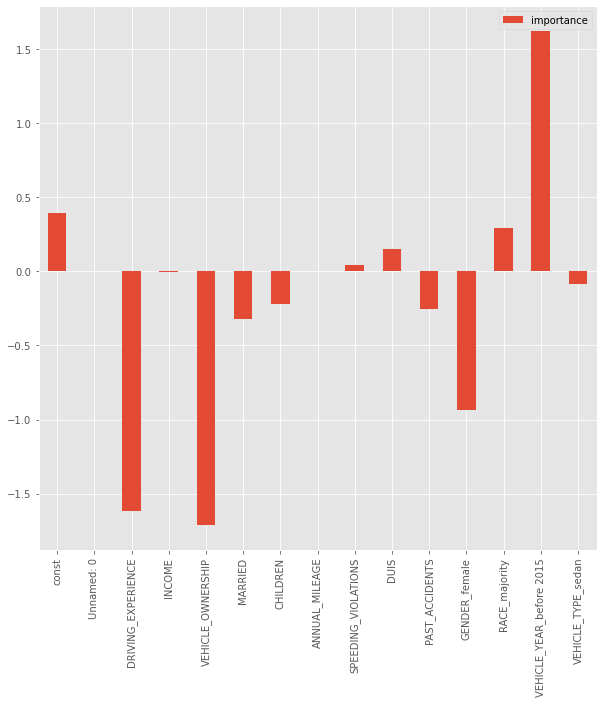

In [51]:
feature_importance.plot(kind='bar', figsize=(10,10))

In [52]:
feature_importance

,importance
const,0.393969
Unnamed: 0,0.000006
DRIVING_EXPERIENCE,-1.614912
INCOME,-0.006220
VEHICLE_OWNERSHIP,-1.713574
MARRIED,-0.324358
CHILDREN,-0.219025
ANNUAL_MILEAGE,0.000043
SPEEDING_VIOLATIONS,0.041402
DUIS,0.151841


**CONCLUSIONES DEL MODELO 1:**

En este primer modelo podemos ver que, aunque el "accuracy" es alto (84%) y la cantidad de falsos positivos no es muy alta en relación al total de positivos, sin embargo la cantidad de falsos negativos es alta (+30% de todos los negativos).

Así mismo, podemos ver en la tabla de resultados que el R2 del modelo es unicamente del 0.4, un número muy alejado de un 0.7 que sería aceptable. 

Por lo anteriormente mencionado es por esto por lo que **vamos a efectuar un segundo intento de modelaje eliminando las variables con p-valor > 0.1**. La idea es que a eliminar esta variables con un p-valor malo, el R2 del modelo suba, y se acerque más al 0.7

## 2) Segundo modelo eliminando las variables con p-valor > 0.1

In [60]:
# Eliminando las variables con p-valor > 0.1
df5 = df4.drop(['INCOME', 'VEHICLE_TYPE_sedan','SPEEDING_VIOLATIONS','Unnamed: 0'], axis=1)

In [61]:
df5.head()

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,DUIS,PAST_ACCIDENTS,OUTCOME,GENDER_female,RACE_majority,VEHICLE_YEAR_before 2015
0,0,1.0,0.0,1.0,12000.0,0,0,0.0,1,1,0
1,0,0.0,0.0,0.0,16000.0,0,0,1.0,0,1,1
2,0,1.0,0.0,0.0,11000.0,0,0,0.0,1,1,1
3,0,1.0,0.0,1.0,11000.0,0,0,0.0,0,1,1
4,1,1.0,0.0,0.0,12000.0,0,1,1.0,0,1,1


In [62]:
# División de los datos en train y test: sacamos la variable target y cogemos el 80% del dataset para el train y el 20% para el test

X = df5.drop(columns = 'OUTCOME')
y = df5['OUTCOME']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [63]:
X_train2.head()

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,DUIS,PAST_ACCIDENTS,GENDER_female,RACE_majority,VEHICLE_YEAR_before 2015
6731,1,0.0,0.0,1.0,18000.0,0,0,1,1,1
941,1,0.0,0.0,0.0,14000.0,0,0,1,1,1
6023,1,0.0,0.0,1.0,13000.0,0,0,0,1,1
8895,0,1.0,1.0,1.0,9000.0,0,0,1,1,1
3574,3,1.0,1.0,1.0,12000.0,1,5,1,1,1


In [64]:
# Creación del modelo utilizando matrices como en scikitlearn

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train2 = sm.add_constant(X_train2, prepend=True)
modelo2 = sm.Logit(endog=y_train, exog=X_train2,)
modelo2 = modelo2.fit()
print(modelo2.summary2())

Optimization terminated successfully.
         Current function value: 0.365201
         Iterations 7
                             Results: Logit
Model:                 Logit               Pseudo R-squared:    0.408    
Dependent Variable:    y                   AIC:                 5305.7320
Date:                  2022-05-11 15:03    BIC:                 5381.4841
No. Observations:      7234                Log-Likelihood:      -2641.9  
Df Model:              10                  LL-Null:             -4465.3  
Df Residuals:          7223                LLR p-value:         0.0000   
Converged:             1.0000              Scale:               1.0000   
No. Iterations:        7.0000                                            
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
const                     0.3992   0.259

In [65]:
# Accuracy de test del modelo 2

X_test2 = sm.add_constant(X_test2, prepend=True)
predicciones2 = modelo2.predict(exog = X_test2)
clasificacion2 = np.where(predicciones2<0.5, 0, 1)
accuracy2 = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion2,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy2}%")


El accuracy de test es: 83.91376451077943%


In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test2, clasificacion2)

array([[1105,  120],
       [ 171,  413]], dtype=int64)

In [67]:
feature_importance2 = pd.DataFrame(modelo2.params, columns=['importance'])

<AxesSubplot:>

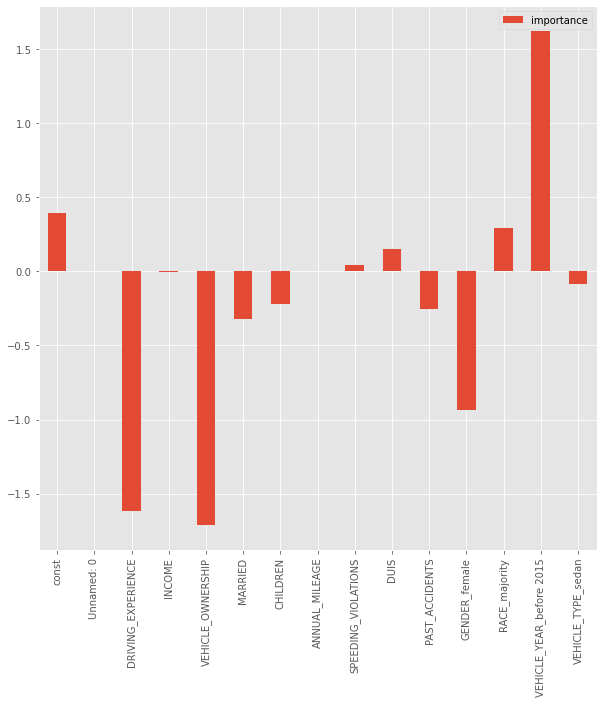

In [68]:
feature_importance.plot(kind='bar', figsize=(10,10))

In [69]:
feature_importance2

,importance
const,0.399245
DRIVING_EXPERIENCE,-1.561927
VEHICLE_OWNERSHIP,-1.716559
MARRIED,-0.328300
CHILDREN,-0.223993
ANNUAL_MILEAGE,0.000038
DUIS,0.166479
PAST_ACCIDENTS,-0.251878
GENDER_female,-0.953954
RACE_majority,0.288981


**CONCLUSIONES DEL MODELO 2:**

En este segundo modelo podemos ver que a pesar de haber eliminado la variables con un p-valor mayor a 0.1, tanto el "accuracy" como el R2 del modelo se mantienen igual que el Modelo 1 (40% y 84%). Sin embargo ha empeorado los falsos negativos ligeramente. En conclusion se puede decir que este segundo intento no ha mejorado el Modelo 1.